# Outlier Detection & Treatment

## Outlier Impact
- **Skewed Statistics**: Means and standard deviations can be distorted.
- **Misleading Visualizations**: Outliers affect the readability of charts and graphs.
- **Model Performance Issues**: In machine learning, outliers can cause models to misfit data, leading to poor generalization.

## Outlier Detection Techniques
- There are several ways to detect outliers, each with its own strengths and limitations.
    - Z-score method
    - IQR (Interquartile Range) method
    - Robust methods 


| Method  | Best For                  | Limitations                          | Suitable Distributions |
| ------- | ------------------------- | ------------------------------------ | ---------------------- |
| Z-score | Normally distributed data | Sensitive to extreme values          | Normal                 |
| IQR     | Skewed distributions      | May not work well for small datasets | Skewed or normal       |
| MAD     | Skewed or non-normal data | Interpretation can be complex        | Highly skewed          |

In [11]:
import pandas as pd
import numpy as np
import plotly.express as px

In [18]:
df = pd.read_csv("/Users/codexplore/Developer/repos/machine-learning-101/data/common_datasets/housing.csv")
df = df[~(df["median_house_value"] > 500_000)]
df.shape

(19675, 10)

In [19]:
fig = px.histogram(df, x="median_house_value",  marginal='box')
fig.show()

### Z-score method
- The Z-score method identifies outliers based on the number of standard deviations a data point is from the mean.
- Generally, any data point with a **Z-score greater than 3 (or less than -3)** is considered an **outlier**.
$$Z=\frac{X-\mu}{\sigma}$$
- Where:
    - $X$ the data point
    - $\mu$ the mean
    - $\sigma$ the standard deviation
- **Pros and Cons**:
    - **Pros**: Easy to implement, works well for normally distributed data.
    - **Cons**: Not ideal for skewed data, sensitive to extreme outliers.

In [25]:
# check the outlier for the column "median_house_value"
# Calculate Z-scores
df['z_score'] = (df['median_house_value'] - df['median_house_value'].mean()) / df['median_house_value'].std()
# Identify outliers
outliers = df[np.abs(df['z_score']) > 3]
print(f"Total Outliers: {outliers.shape[0]}")
outliers.head()

Total Outliers: 82


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,z_score
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY,3.040809
1581,-122.03,37.86,25.0,3004.0,393.0,1145.0,376.0,7.2655,494000.0,NEAR BAY,3.085840
1639,-122.18,37.89,18.0,4845.0,735.0,1634.0,734.0,8.1489,499000.0,NEAR BAY,3.137011
4068,-118.48,34.15,31.0,2536.0,429.0,990.0,424.0,5.4591,495500.0,<1H OCEAN,3.101191
4076,-118.45,34.14,33.0,1741.0,274.0,588.0,267.0,7.9625,490800.0,<1H OCEAN,3.053090


### Interquartile Range (IQR) Method
- The IQR method identifies outliers by measuring the spread of the middle 50% of the data. 
- The IQR is calculated as $IQR = Q3-Q1$
- Outlier will be less than $Q1 - 1.5*IQR$ or greater than $Q3 + 1.5*IQR$
- **Pros and Cons**:
    - **Pros**: Robust to extreme outliers, works well with skewed distributions.
    - **Cons**: Not suitable for small datasets.

In [21]:
# Calculate Q1 and Q3
Q1 = df['median_house_value'].quantile(0.25)
Q3 = df['median_house_value'].quantile(0.75)
IQR = Q3 - Q1
lower_bound, upper_bound = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['median_house_value'] < lower_bound) | (df['median_house_value'] > upper_bound)]
print(lower_bound, upper_bound)
print(f"Total Outliers: {outliers.shape[0]}")
outliers.head()


-80800.0 445600.0
Total Outliers: 351


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
140,-122.18,37.81,30.0,292.0,38.0,126.0,52.0,6.3624,483300.0,NEAR BAY
489,-122.25,37.86,48.0,2153.0,517.0,1656.0,459.0,3.0417,489600.0,NEAR BAY
490,-122.25,37.86,52.0,1389.0,191.0,514.0,202.0,7.0897,446200.0,NEAR BAY
491,-122.25,37.86,52.0,1709.0,318.0,719.0,295.0,5.0463,456300.0,NEAR BAY


###  Median Absolute Deviation (MAD)
- **Median Absolute Deviation (MAD)** is a robust statistical method that measures data variability. 
    - Instead of using the mean and standard deviation, MAD is based on the **median**, making it *less sensitive to extreme values*.
- MAD is calculated as 
$$MAD = median(|X- median(X)|)$$
- Outliers are identified as data points that are more than a **specified threshold (typically 3)** away from the median in terms of MAD.
- **Pros and Cons**:
    - **Pros**: Highly robust, ideal for skewed data.
    - **Cons**: May be more complex to interpret

In [23]:
# Calculate the median and MAD
median = df['median_house_value'].median()
mad = np.median(np.abs(df['median_house_value'] - median))

# Identify outliers
threshold = 3  # Typically set to 3 or 3.5
outliers = df[np.abs(df['median_house_value'] - median) / mad > threshold]
print(f"Total Outliers: {outliers.shape[0]}")
outliers.head()

Total Outliers: 1301


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
120,-122.24,37.83,41.0,2576.0,406.0,794.0,376.0,5.9560,366100.0,NEAR BAY
122,-122.23,37.85,52.0,2800.0,411.0,1061.0,403.0,6.3434,373600.0,NEAR BAY
123,-122.24,37.84,52.0,3529.0,574.0,1177.0,555.0,5.1773,389500.0,NEAR BAY
124,-122.24,37.85,52.0,2612.0,365.0,901.0,367.0,7.2354,391100.0,NEAR BAY


## Outlier Treatments
- Once outliers identified, there are several common techniques to handle this:
    - Outlier Removal:
        - Pros: Eliminates extreme values that could skew results. 
        - Cons: Risk of losing valuable data if outliers are genuine.    
    - Capping: setting a limit on the maximum and minimum values.
        - Pros: Retains all data while limiting extreme values. 
        - Cons: Reduces variability, may distort true values
    - Transformation: logarithmic, square root, or Box-Cox
        - Pros: Reduces the influence of large outliers. 
        - Cons: May make data interpretation more difficult.

### Outlier Removal
- Outliers are unusual values in your dataset, and they can distort statistical analyses. 

In [26]:
# Removing outliers based on Z-score
df_no_outliers = df[(np.abs(df['z_score']) <= 3)]

### Capping

In [28]:
# Capping at Q1 - 1.5 * IQR and Q3 + 1.5 * IQR
df['capped_median_house_value'] = np.where(df['median_house_value'] <lower_bound, lower_bound, df['median_house_value'])
df['capped_median_house_value'] = np.where(df['median_house_value'] > upper_bound, upper_bound, df['median_house_value'])

### Transformation
- Data transformations such as **logarithmic**, **square root**, or **Box-Cox** transformations can reduce the impact of outliers by compressing large values.

In [29]:
# Log transformation (works only for positive data)
df['log_median_house_value'] = np.log1p(df['median_house_value'] + 1)

### Create Outlier Removal as Custom Transformers

In [9]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_array, check_is_fitted
from sklearn.compose import ColumnTransformer
import numpy as np

from sklearn import datasets

iris = datasets.load_iris()
iris_df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [10]:
class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5, lower_quantile=0.25, upper_quantile=0.75,replace_method="NaN"):
        replace_methods = ["NaN", "Bounded"]
        self.factor = factor
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile
        if replace_method not in replace_methods: 
            raise ValueError(f"replace_method should be {replace_methods}")
        else:
            self.replace_method = replace_method
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(self.lower_quantile)
        q3 = X.quantile(self.upper_quantile)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X, y=None):
        X = pd.DataFrame(X).copy()
        
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            if self.replace_method == "NaN":
                x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            if self.replace_method== "Bounded":
                x[(x < self.lower_bound[i])] = self.lower_bound[i]
                x[(x > self.upper_bound[i])] = self.upper_bound[i]
            X.iloc[:, i] = x
        
        return X
    
outlier_remover = OutlierRemover()

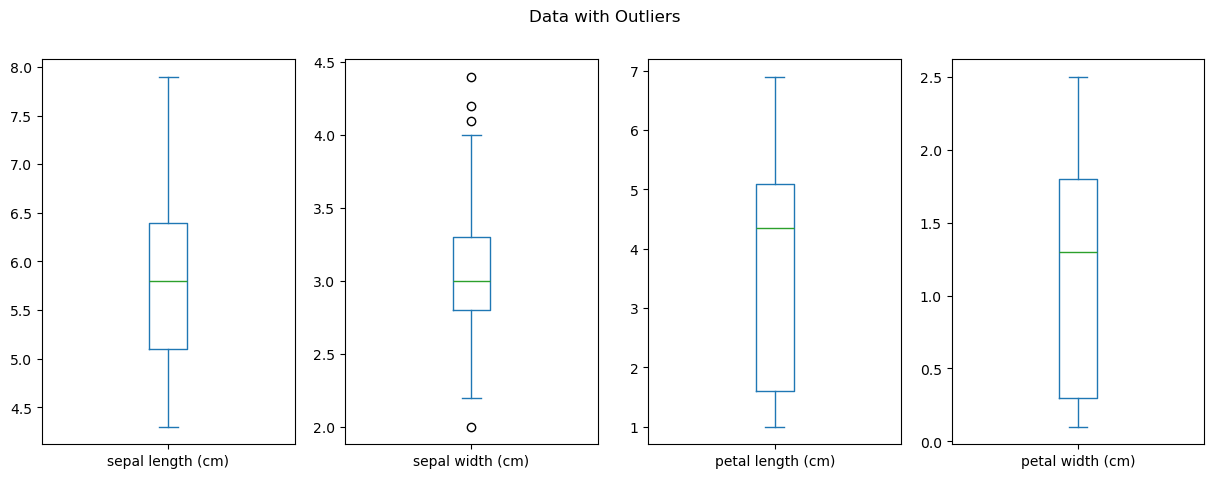

In [11]:
iris_df.plot(kind="box",subplots=True,figsize=(15,5),title="Data with Outliers");

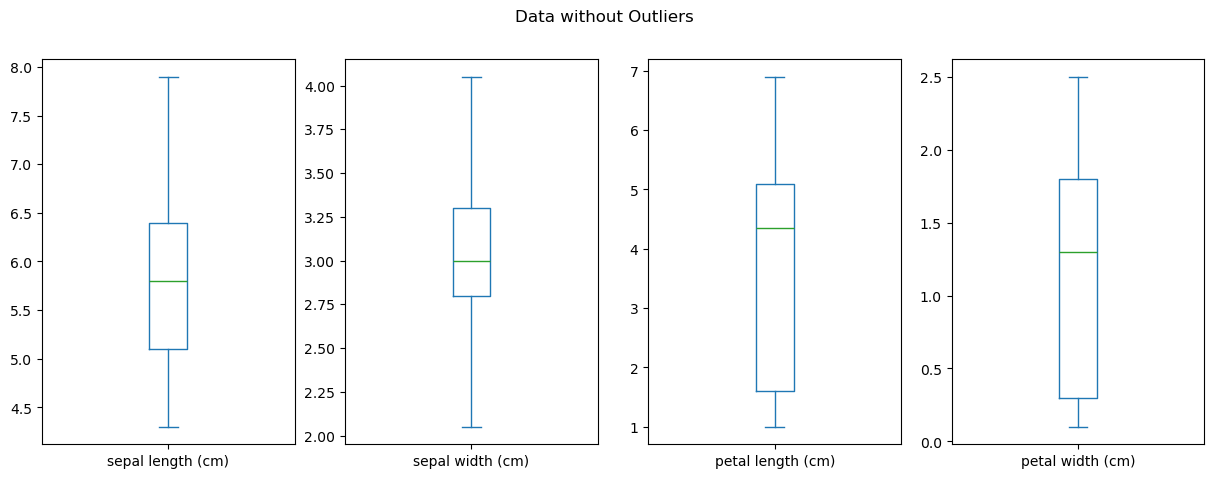

In [20]:
outlier_remover = OutlierRemover()

#ColumnTransformer to remove outliers
ct = ColumnTransformer(transformers=[['outlier_remover',OutlierRemover(lower_quantile=0.25, upper_quantile=0.75, replace_method="Bounded"), iris_df.columns]],remainder='passthrough')

#iris data after outlier removal
data_without_outliers = pd.DataFrame(ct.fit_transform(iris_df),columns=iris_df.columns)

#iris data box plot after outlier removal
data_without_outliers.plot(kind="box",subplots=True,figsize=(15,5),title="Data without Outliers");


In [15]:
# 4 outliers are removed from SepalWidthCm, other columns stayed the same as they have no outliers.
data_without_outliers.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64